# CHAPTER 30: Kalman Filter

### This code generates figures 2, 4, and 6 from Chapter 30: Kalman Filter (vol II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import scipy

## Example 30.3 (Estimating a DC level)

Consider an unknown zero-mean scalar random variable $\boldsymbol{x}(0)$ with variance $\pi_0$. Assume the state realization $\boldsymbol{x}(n)$ remains constant over time across all collected noisy measurements, i.e., 

$$
\left\{\begin{array}{ccl}\boldsymbol{x}(n+1)=\boldsymbol{x}(n),\;\;n\geq 0 \\
\boldsymbol{y}(n)=\boldsymbol{x}(n)\;+\;\boldsymbol{v}(n)\end{array}\right. \tag{30.91}
$$

where $\boldsymbol{v}(n)$ is a
zero-mean white-noise process with variance $\sigma_v^2$ and uncorrelated with $\boldsymbol{x}(0)$ for all $n$.
The state equation asserts that the
initial state vector remains unchanged over time; thus, any Kalman
filtering solution that estimates the state vector from the measurements
will in effect be estimating the initial state vector from these
same measurements. Models of this type are useful in many contexts. For example, assume we model
the sea level as fluctuating around
some constant height $\boldsymbol{x}(0)$. The quantities $\boldsymbol{y}(n)$ would
correspond to noisy measurements of the sea level collected by a
sensor at various time instants $n$ --- see Fig. 30.1.

We can write down the Kalman filtering equations for model (30.91) to estimate the state
variable from the noisy measurements. Comparing with the standard
model (30.28)--(30.29), we find that all
variables are now scalars. The model coefficients
are time-invariant and given by

$$F=1,\;\;G=0,\;\;H=1,\;\;Q=0,\;\;\;R=\sigma_v^2,\;\;\;S=0,\;\;\;\Pi_0=\pi_0 \tag{30.91}$$

We start from 
$\widehat{\boldsymbol{x}}(0|-1)=0$, $p(0|-1)=\pi_o$, and repeat for $n\geq 0$:

$$r_e(n)=\sigma_v^2+p(n|n-1) \tag{30.93a}$$

$$k_{p}(n) = \frac{p(n|n-1)}{\sigma_v^2+p(n|n-1)} \tag{30.93b}$$

$$\boldsymbol{e}(n) = \boldsymbol{y}(n)-{\widehat {\boldsymbol{x}}}(n|n-1) \tag{30.93c}$$

$$\widehat{\boldsymbol{x}}(n+1|n) =
\widehat{\boldsymbol{x}}(n|n-1)+k_{p}(n)\boldsymbol{e}(n) \tag{30.93d}$$

$$p(n+1|n)=p(n|n-1)\;-\; \frac{p^2(n|n-1)}{\sigma_v^2+p(n|n-1)} \tag{30.93e}$$

A couple of simplifications are possible
given the nature of the state-space model in this case, especially
since $G=0$ and the state variable remains pegged at its initial
value $\boldsymbol{x}(0)$.

To begin with, since $\boldsymbol{x}(n)=\boldsymbol{x}(0)$ for all $n$, we can replace the
filtered notation $\widehat{\boldsymbol{x}}(n|n-1)$ by 

$$\widehat{\boldsymbol{x}}(0|n-1): 
\widehat{\boldsymbol{x}}(0|n-1)\;=\;\widehat{\boldsymbol{x}}(n|n-1) \tag{30.94}$$

The term $\widehat{\boldsymbol{x}}(0|n-1)$
denotes the estimator for $\boldsymbol{x}(0)$ given the measurements
$\{\boldsymbol{y}(m)\}$ up to  time $n-1$. Moreover, we can rework
recursion (30.93e) and derive a closed-form expression
for $p(n+1|n)$ as follows. First note that by grouping the two terms
on the right-hand side of (30.93e) we get 

$$p(n+1|n)\;=\;\frac{1}{1/p(n|n-1)\;+\;1/\sigma_v^2} \tag{30.95}$$

so that the inverse of $p(n+1|n)$ satisfies the following recursion:

$$\frac{1}{p(n+1)|n)}\;=\;\frac{1}{p(n|n-1)}+\frac{1}{\sigma_v^2},\;\;\;\;\;\;\frac{1}{p(0|-1)}=\frac{1}{\pi_0} \tag{30.96}$$

Iterating from $n=0$ we find that
$$ p^{-1}(n+1|n)\;=\; \frac{1}{\pi_0}\;+\;\frac{n+1}{\sigma_v^2} \tag{30.97} $$

so that

$$ p(n+1|n)\;=\;\frac{\sigma_v^2}{(n+1)+\sigma_v^2/\pi_0} \tag{30.98} $$

and

$$k_p(n)=\frac{1}{(n+1)+\sigma_v^2/\pi_0} \tag{30.99} $$

Substituting into (30.93d) we arrive at the
following update for estimating the DC level $\boldsymbol{x}(0)$: 

$$ \widehat{\boldsymbol{x}}(0|n)\;=\;\left(\dfrac{n+\sigma_v^2/\pi_0}{(n+1)+\sigma_v^2/\pi_0}\right)\,\widehat{\boldsymbol{x}}(0|n-1)\;+\;
\left(\dfrac{1}{(n+1)+\sigma_v^2/\pi_o}\right)\,\boldsymbol{y}(n) \tag{30.100}$$

with initial condition
$\widehat{\boldsymbol{x}}(0|-1)=0$. The ratio $\pi_0/\sigma_v^2$ can be interpreted
as a signal-to-noise ratio (SNR) since $\pi_0$ corresponds
to the variance of the desired signal and $\sigma_v^2$ corresponds
to the variance of the interfering noise.

Figure 30.2 illustrates the result of a simulation
using $\pi_0=2$ and $\sigma_v^2=0.01$; these values correspond to an
SNR value of

$$\textnormal{SNR}\;=\;10\log_{10}\left(\frac{\pi_o}{\sigma_v^2}\right)\;\approx\;23\;\textnormal{dB} \tag{30.101}$$

The figure shows the simulated initial state $\boldsymbol{x}(0)$; the noisy measurements $\boldsymbol{y}(n)$ fluctuating around $\boldsymbol{x}(0)$,
and the successive estimates $\widehat{\boldsymbol{x}}(0|n)$ over the first $100$
iterations.


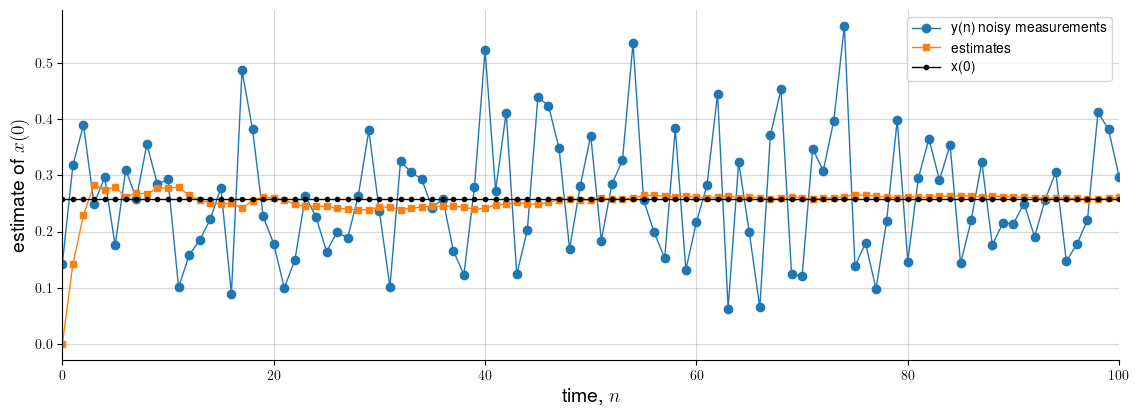

In [2]:
#Example 30.3 (Estimating DC Level)

N = 200
pio = 2
sigma_v_sq = 0.01

xo = np.sqrt(pio)*np.random.rand()

y = xo*np.ones(N) + np.sqrt(sigma_v_sq)*np.random.randn(N)
dc_value = xo*np.ones(N)

aux = 0
snr = pio/sigma_v_sq
hat_x = []

for n in range(N):
    hat_x.append(aux)
    b = 1/((1/snr)+n+1)
    a = ((1/snr)+n)*b
    aux = a*aux + b*y[n]

hat_x = np.array(hat_x)

#figure 2 (DC level)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=30, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.plot(range(N), y, marker="o", linewidth=1, label="y(n) noisy measurements")
ax.plot(range(N), hat_x, marker="s", linewidth=1, markersize=4, label="estimates")
ax.plot(range(N), dc_value, marker="o", color="black", linewidth=1, markersize=3, label="x(0)")
ax.set_xlabel(r'time, $n$', fontsize=14)
ax.set_ylabel(r'estimate of $x(0)$', fontsize=14)
ax.set_xlim([0,100])
ax.spines[['right', 'top']].set_visible(False)
ax.grid(alpha=0.5)
ax.legend()

plt.show()

**Figure 30.2** Estimation of the initial state value $\boldsymbol{x}(0)$ for a simulation using $\pi_o=2$ and $\sigma_v^2=0.01$, which corresponds to an SNR level at approximately $23$ dB.

## Example 30.5 (Tracking a moving target)

Our third example involves tracking a moving target. We consider a simplified model and assume the target is
moving within the vertical plane. The target is launched from location
$(x_o,y_o)$ at an angle $\theta$ with the horizontal axis at an
initial speed $v$ --- see Fig. 30.3. The initial velocity components along the
horizontal and vertical directions are

$$v_x(0)=v\cos\theta,\;\;\;\;v_y(0)=v\sin\theta \tag{30.105}$$

The motion of the object is governed by Newton's equations; the acceleration along the
vertical direction is downwards and its magnitude is given by
$g\approx 10$ m/s$^2$. The motion along the horizontal direction is
uniform (with zero acceleration) so that the horizontal velocity
component is constant for all time instants and remains equal to
$v_x(0)$: 

$$v_x(t)=v\cos\theta,\;\;\;t\geq 0 \tag{30.106}$$

For the vertical
direction, the velocity component satisfies the equation of motion:

$$v_y(t)=v\sin\theta -gt,\;\;\;t\geq 0 \tag{30.107}$$

We denote the location coordinates of the object at any time $t$ by
$(x(t),y(t))$. These coordinates satisfy the differential equations

$$\frac{dx(t)}{dt}=v_x(t),\;\;\;\;\; \frac{dy(t)}{dt}=v_y(t) \tag{30.108}$$

We sample the equations every $T$ units of time and write

$$v_x(n)\overset{\Delta}{=} v_x(nT)\;=\;v\cos\theta \tag{30.109a}$$
$$v_y(n)\overset{\Delta}{=} v_y(nT)\;=\;v\sin\theta\;-\;ngT \tag{30.109b}$$
$$x(n+1)=x(n)+Tv_x(n) \tag{30.109c}$$
$$y(n+1)=y(n)+Tv_y(n) \tag{30.109d}$$

As such, the dynamics of the moving object
can be approximated by the following discretized state-space
equation: 

$$
\underbrace{\begin{bmatrix}
x(n+1)\\
y(n+1) \\
v_{x}(n+1) \\
v_{y}(n+1)
\end{bmatrix}}_{\boldsymbol{x}_{n+1}} = 
\underbrace{\begin{bmatrix}
1 & 0 & T & 0 \\
0 & 1 & 0 & T \\
0  & 0  & 1 & 0  \\
0 & 0 & 0 & 1 
\end{bmatrix}}_{F} \;\;\;
\underbrace{\begin{bmatrix}
x(n)\\
y(n) \\
v_{x}(n) \\
v_{y}(n)
\end{bmatrix}}_{\boldsymbol{x}_n} \underbrace{-
\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix} gT}_{d_n} \tag{30.110}
$$

Note that the state vector $\boldsymbol{x}_n$ in this model
involves four entries. Compared with (30.88), we see
that the state recursion  includes a $\textit{deterministic}$
driving term and does not include process noise (i.e., $G=0$); if desired,
we may include a process noise term to model disturbances in the
state evolution (such as errors arising from the discretization
process).

The tracking problem deals with  estimating and tracking
the state vector $\boldsymbol{x}_n$ based on noisy measurements of the
location coordinates $(x(n),y(n))$ of the object. We denote the measurement vector
by $\boldsymbol{z}_n$ and it satisfies:


$$\boldsymbol{z}_{n} = 
\underbrace{\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}}_H\;\;\;
\begin{bmatrix}
x(n)\\
y(n) \\
v_{x}(n) \\
v_{y}(n)
\end{bmatrix} + \boldsymbol{w}_{n} \tag{30.111}
$$

where $\boldsymbol{w}_n$ denotes a $2\times 1$ zero-mean white
noise process with some covariance matrix $R$. The entries of
the vector $\boldsymbol{z}_n$ are noisy measurements of the $x-$ and
$y-$ coordinates of the location of the moving object. Using
(30.90a)--(30.90e), the Kalman filter
equations for this example are as follows. We start from
$\widehat{\boldsymbol{x}}_{0|-1}=0$, $P_{0|-1}=\Pi_0$, and then repeat for $n\geq
0$: 


$$R_{e,n} =R+HP_{n|n-1}H^{\sf T} \tag{30.112a}$$
$$K_{p,n} = FP_{n|n-1}H^{\sf T}R_{e,n}^{-1} \tag{30.112b}$$
$$\boldsymbol{e}_n = \boldsymbol{z}_n-H{\widehat {\boldsymbol{x}}}_{n|n-1} \tag{30.112c}$$
$$\widehat{\boldsymbol{x}}_{n+1|n} =
F\widehat{\boldsymbol{x}}_{n|n-1}+K_{p,n}\boldsymbol{e}_{n}+d_n \tag{30.112d}$$
$$P_{n+1|n} =  FP_{n|n-1}F^{\sf T}   -  K_{p,n} R_{e,n}
K_{p,n}^{\sf T} \tag{30.112e}$$

Figure 30.4
illustrates the result of simulating this solution using the
following numerical values:

$$
\Pi_0 = I, \;\;\; 
R = \begin{bmatrix}
0.3 & \\
& 0.3 
\end{bmatrix}, \;\;\;
(x_0, y_0) = (1, 30), \;\;\;
v = 15, \;\;\;
T  = 0.01, \;\;\;
\theta = 60^o
$$

It is seen in the bottom plot that the actual and estimated
trajectories are close to each other.

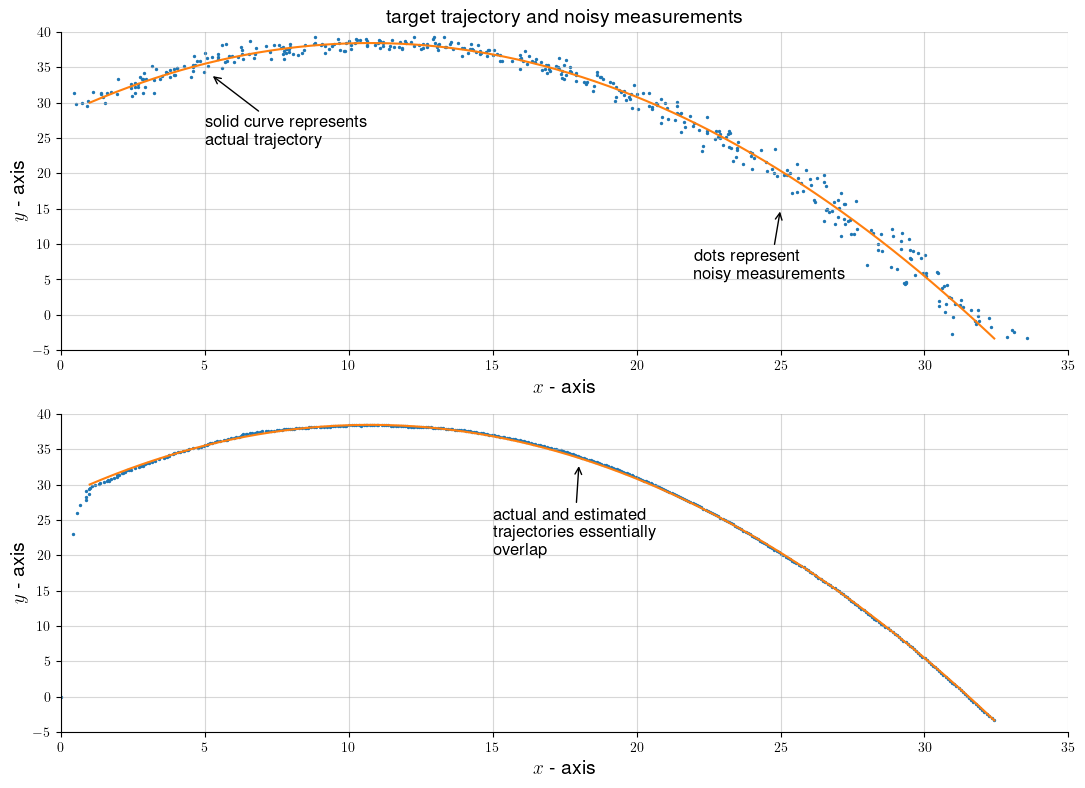

In [39]:
#Run Example 5 (Tracking a moving target)

N = 420
T = 0.01
g = 10

F = np.array(
    [
        [1, 0, T, 0],
        [0, 1, 0, T],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)

H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

xo = 1
yo = 30
theta = np.pi/3
v = 15 #initial speed

vxo = v*np.cos(theta)
vyo = v*np.sin(theta)

variance_w = 0.3
R = variance_w*np.eye(2)
Pio = np.eye(4)

n = np.arange(0, 420, 1)
vx = vxo*np.ones(N)
vy = vyo*np.ones(N) - g*T*n
x = xo + vxo*n*T
y = yo + vyo*n*T - 0.5*g*(n*T)**2

z = np.array([
    x+np.sqrt(variance_w)*np.random.randn(N),
    y+np.sqrt(variance_w)*np.random.randn(N)
])


hat_x = np.zeros((4, N))
P = Pio
e = np.zeros((2, N))
d = -g*T*np.array([0, 0, 0, 1])

for n in range(N-1):
    Re = R + H@P@H.T
    Kp = F@P@H.T@np.linalg.inv(Re)
    e[:, n] = z[:, n] - H@hat_x[:, n]
    hat_x[:, n+1] = F@hat_x[:, n] + Kp@e[:, n] + d
    P = F@P@F.T - Kp@Re@Kp.T

#Figure 4

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13,5
fig = plt.figure()

plt.subplots_adjust(bottom=0.1, top=1.5)

ax = fig.add_subplot(211)
ax.scatter(z[0], z[1], s=2)
ax.plot(x, y, color="tab:orange")
ax.set_xlabel(r'$x$ - axis', fontsize=14)
ax.set_ylabel(r'$y$ - axis', fontsize=14)
ax.set_ylim([-5, 40])
ax.set_xlim([0, 35])
plt.xticks(np.arange(0, 40, 5))
ax.set_title("target trajectory and noisy measurements", fontsize=14)
ax.grid(alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax.annotate("solid curve represents \n actual trajectory", xy=(5.2, 34), xytext=(5, 24), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')
ax.annotate("dots represent \n noisy measurements", xy=(25, 15), xytext=(22, 5), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')

ax = fig.add_subplot(212)
ax.scatter(hat_x[0], hat_x[1], s=2)
ax.plot(x, y, color="tab:orange")
ax.set_xlabel(r'$x$ - axis', fontsize=14)
ax.set_ylabel(r'$y$ - axis', fontsize=14)
ax.set_ylim([-5, 40])
ax.set_xlim([0, 35])
plt.xticks(np.arange(0, 40, 5))
ax.grid(alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax.annotate("actual and estimated \n trajectories essentially \n overlap", xy=(18, 33), xytext=(15, 20), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')

plt.show()

**Figure 30.4** The top plot shows the actual
and measured positions of the target. The bottom plot shows the
actual and estimated trajectories.

## Example 30.10 (Tracking a moving object in 2D)

An object is moving in 2D as shown in Fig. 30.5. We denote its coordinates at any instant $n$ by $\textnormal{col}\{a_{n},b_{n}\}$, where $a_{n}$ is the horizontal coordinate and $b_{n}$ is the vertical coordinate. The velocity components along the horizontal and vertical axes are denoted by $\textnormal{col}\{v_{a,n}, v_{b,n}\}$. Therefore, at any instant in time, the state of the object is described by the four-dimensional state vector $x_n=\textnormal{col}\{a_n,b_n,v_{a,n},v_{b,n}\}$. We assume this vector evolves according to the dynamics:

$$
\begin{bmatrix}
a_n\\
v_{a, n} \\
b_n \\
v_{b, n}
\end{bmatrix} = 
\begin{bmatrix}
1 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0  & 0  & 1 & 1  \\
0 & 0 & 0 & 1 
\end{bmatrix} \;\;\;
\begin{bmatrix}
a_{n-1}\\
v_{a, n-1} \\
b_{n-1} \\
v_{b, n-1}
\end{bmatrix} +
\begin{bmatrix}
0.5 & 0\\
1 & 0\\
0 & 0.5\\
0 & 1
\end{bmatrix} \;\;\;
\begin{bmatrix}
u_{a, n}\\
v_{b, n}
\end{bmatrix} \tag{30.225}
$$


where the perturbation $\boldsymbol{u}_{n}\sim{\cal N}_{u_n}(0,q I_2)$. The observations are noisy measurements of the distance and angle viewed from an observer at the origin, i.e.,

$$y_n = 
\begin{bmatrix}
\sqrt{a_n^2+b_n^2} \\
\arctan(b_n/a_n)
\end{bmatrix} + v_n \tag{30.256}$$

where $\boldsymbol{v}_{n}\sim {\cal N}_{v_n}(0,r I_2)$.

The initial state $\boldsymbol{x}_0\sim{\cal N}_{x_0}(\bar{x}_0,\Pi_0)$ is Gaussian-distributed with 

$$
\bar{x} =
\begin{bmatrix}
0 \\
0 \\
0.2 \\
=0.1
\end{bmatrix}, \;\;\;
\Pi_0 =
\begin{bmatrix}
0.10 & & & \\
& 0.01 & & \\
& & 0.10 & \\
& & & 0.01
\end{bmatrix} \tag{30.257}
$$

We assume the numerical values

$$q = 1\times 10^{-6},\;\;r=5\times 10^{-6} \tag{30.258}$$

Noting that $b_n$ and $a_n$ are the third and first entries of the state vector, we conclude from the output equation (30.256) that 

$$
h(x) = 
\begin{bmatrix}
\sqrt{a_n^2+b_n^2} \\
\arctan(b_n/a_n)
\end{bmatrix} \tag{30.259}
$$

$$
H_n \overset{\Delta}{=} \frac{\partial h(x)}{\partial x}= 
\begin{bmatrix}
\dfrac{a_n}{\sqrt{a_n^2+b_n^2}} & 0 & \dfrac{b_n}{\sqrt{a_n^2+b_n^2}} & 0 \\
-\dfrac{b_n}{a_n^2+b_n^2} & 0 & \dfrac{a_n}{a_n^2+b_n^2} & 0
\end{bmatrix} \tag{30.260}
$$

The EKF equations in this case become:

$$
\boldsymbol{d}_n \overset{\Delta}{=} \sqrt{\widehat{\boldsymbol{a}}_{n|n-1}^2+\widehat{\boldsymbol{b}}_{n|n-1}^2} \tag{30.261a}
$$

$$
H_n = 
\begin{bmatrix}
\widehat{\boldsymbol{a}}_{n|n-1}/{\boldsymbol{d}_n} & 0 & \widehat{\boldsymbol{b}}_{n|n-1}/{\boldsymbol{d}_n} & 0 \\
-\widehat{\boldsymbol{b}}_{n|n-1}/{\boldsymbol{d}_n^2} & 0 & {\widehat{\boldsymbol{a}}_{n|n-1}}/{\boldsymbol{d}_n^2} & 0
\end{bmatrix} \tag{30.261b}
$$

$$
R_{e,n}=rI_2 + H_ n P_{ n| n-1} H_ n^{\sf T} \tag{30.261c}
$$

$$
K_{f, n}   =   P_{ n| n-1} H_ n^{\sf T} R_{e,n}^{-1} \tag{30.261d}
$$

$$
\widehat{\boldsymbol{x}}_{ n| n}=\widehat{\boldsymbol{x}}_{ n| n-1} +  K_{f, n} \Bigl(\boldsymbol{y}_ n - h(\widehat{\boldsymbol{x}}_{n|n-1})\Bigr) \tag{30.261e}
$$

$$
\widehat{\boldsymbol{x}}_{ n+1| n}   =  F\,\widehat{\boldsymbol{x}}_{ n| n} \tag{30.261f}
$$

$$
P_{ n| n}   =   (I_4 - K_{f, n} H_ n) P_{ n| n-1} \tag{30.261g}
$$

$$
P_{ n+1| n}   =   F P_{ n| n} F^{\sf T}  + qG G^{\sf T} \tag{30.261h}
$$

The EKF and UKF filters do not perform uniformly well across all simulations; they fail in several instances.  Figure 30.6 shows the actual and estimated trajectories over $0\leq n\leq 100$ using both EKF and UKF for a situation where the filters are able to track the actual trajectory to some reasonable degree. The main challenge for EKF arises from the error in approximating $h(x)$ by the Jacobian $H_n$. One challenge for UKF arises from the relation updating $P_{n|n-1}$ to $P_{n|n}$; the latter matrix may lose its required nonnegative definiteness due to numerical errors, in which case the square-root factorization would fail. We will revisit this application later in Example 35.2 when we apply particle filters to track the same state variable. 

In [16]:
#Example 10 (Tracking a moving object in 2D)
#Simulating EXTENDED KALMAN FILTERS (EKF, UKF)
#These filters do not always work

M = 4 #state dimension
N = 100 #time horizon

# x0 ~ N(x0_bar,Pi_0); initial state vector

x0_bar = np.array([0, 0, 0.2, -0.1]).reshape(-1, 1) #mean
Pi_0 = np.eye(M) #initial state covariance
Pi_0[0, 0] = 0.1
Pi_0[1, 1] = 0.01
Pi_0[2, 2] = 0.1
Pi_0[3, 3] = 0.01

#State-Space model
F = np.array([
    [1, 1, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1],
    [0, 0, 0, 1]
])

G = np.array([
    [0.5, 0],
    [1, 0],
    [0, 0.5],
    [0, 1]
])

q = 1e-6
r = 5*1e-6

#generate data
x0 = x0_bar + np.sqrt(Pi_0)@np.random.randn(M, 1)
xvec = np.zeros((M, N+1))
yvec = np.zeros((2, N+1))
uvec = np.sqrt(q)*np.random.randn(2, N+1)
vvec = np.sqrt(r)*np.random.randn(2, N+1)
xpast = x0
xvec[:, 0] = x0.reshape(M)

for n in range(N):
    a = xpast[0]
    b = xpast[2]
    yvec[:, n] = np.array([np.sqrt(a**2+b**2), np.arctan(b/a)]).reshape(2) + vvec[:, n]
    xvec[:, n+1] = (F@xpast).reshape(M) + G@uvec[:, n]  #update state
    xpast = xvec[:, n+1]

#Extended Kalman Filter (EKF)
xp = np.zeros((M, N+1)) #predicted state estimates
xf = np.zeros((M, N+1)) #filtered state estimates
Pp = Pi_0 #prediction covariance
Pf = np.zeros((M, M)) #filtered covariance

xp[:, 0] = np.zeros((M)) + 1e-7 #Small pertubation to avoid division by zero 
x_bar = np.zeros((M, N+1)) #Used to propagate mean of state variables
x_bar[:, 0] = x0_bar.reshape(M)

for n in range(N):
    y = yvec[:, n] #observation
    d = np.sqrt((xp[0, n])**2 + (xp[2, n])**2) #distance to origin
    H = np.array([ #Jacobian
        [xp[0, n]/d, 0, xp[2, n]/d, 0],
        [-xp[2, n]/(d**2), 0, xp[0, n]/(d**2), 0]
    ]) 

    Re = r*np.eye(2) + H@Pp@H.T
    Kf = Pp@H.T@np.linalg.inv(Re)

    ang = np.arctan(xp[2, n] / xp[0, n])
    e = (y - H@x_bar[:, n]) - np.array([d, ang]) #subtract the mean to account for nonzero means
    xf[:, n] = xp[:, n] + Kf@e
    xp[:, n+1] = F@xf[:, n]
    x_bar[:, n+1] = F@x_bar[:, n] #propagating state mean 

    Pf = (np.eye(M)-Kf@H)@Pp
    Pp = F@Pf@F.T + q*G@G.T

avec = np.copy(xvec[0, :])
bvec = np.copy(xvec[2, :])

avec = np.insert(avec, 0, x0[0])
bvec = np.insert(bvec, 0, x0[2])

avec_hat = xp[0, :] + x_bar[0, :]
bvec_hat = xp[2, :] + x_bar[2, :]
 

aEKF = avec_hat
bEKF = bvec_hat

#Unscented Kalman Filter (UKF)

xp = np.zeros((M, N+1)) #predicted state estimates
xf = np.zeros((M, N+1)) #filtered state estimates
Pp = np.zeros((M, M)) #prediction covariance
Pf = np.zeros((M, M)) #filtered covariance

L = M
z = np.zeros((M, 2*L+1))
xz = np.zeros((M, 2*L+1))
w = np.zeros((2*L+1, 1))

t = np.zeros((M, 2*L+1))
yt = np.zeros((2, 2*L+1))
wy = np.zeros((2*L+1, 1))

xf_current = x0_bar.reshape(M)
Pf = Pi_0

for n in range(N):
    y = yvec[:, n]

    #time update
    Xf = scipy.linalg.sqrtm(Pf)
    z[:, 0] = xf_current
    w[0] = -1 + 2*np.random.rand()

    scale = np.sqrt(M/(1-w[0]))
    #scale = 1.5065
    #w[0] = -0.7626
    for ell in range(1, L+1):
        z[:, ell] = xf_current + scale*Xf[:, ell-1]
        z[:, ell+L] = xf_current - scale*Xf[:, ell-1]
        w[ell] = (1-w[0])/(2*L)
        w[ell+L] = (1-w[0])/(2*L)

    for ell in range(2*L+1):
        xz[:, ell] = F@z[:, ell]
    xp_aux = np.zeros(M)
    for ell in range(2*L+1):
        xp_aux = xp_aux + (w[ell]*xz[:, ell])

    xp[:, n] = xp_aux

    Pp = q*G@G.T
    for ell in range(2*L+1):
        Pp += w[ell] * (xz[:, ell] - xp[:, n]).reshape(-1, 1)@(xz[:, ell] - xp[:, n]).reshape(-1, 1).T

    #measurement update 
    Xp = scipy.linalg.sqrtm(Pp)
    t[:, 0] = xp[:, n]
    wy[0] = -1 + 2*np.random.rand() #random a number between (-1, 1)
    wy[0] = w[0] #use same wo
    scale = np.sqrt(M/(1-wy[0]))

    for ell in range(1, L+1):
        t[:, ell] = xp[:, n] + scale*Xp[:, ell-1]
        t[:, ell+L] = xp[:, n] - scale*Xp[:, ell-1] 
        wy[ell] = (1-wy[0])/(2*L)
        wy[ell+L] = (1-wy[0])/(2*L)
    
    for ell in range(2*L+1):
        a = t[0, ell]
        b = t[2, ell]
        dist = np.sqrt(a**2 + b**2)
        ang = np.arctan(b/a)
        yt[:, ell] = np.array([dist, ang])
    
    y_hat = np.zeros(2)
    for ell in range(2*L+1):
        y_hat += wy[ell]*yt[:, ell]
    
    covy = r*np.eye(2)
    for ell in range(2*L+1):
        covy += wy[ell]*(yt[:, ell]-y_hat).reshape(-1, 1)@((yt[:, ell]-y_hat).reshape(-1, 1).T)
    
    covxy = np.zeros((M, 2))
    for ell in range(2*L+1):
        covxy += w[ell]*((xz[:, ell]-xp[:, n]).reshape(-1, 1) @ (yt[:, ell]-y_hat).reshape(-1, 1).T)

    Kf = covxy@np.linalg.inv(covy)
    e = y - y_hat
    xf[:, n] = xp[:, n] + Kf@e
    Pf = Pp - Kf@covy@Kf.T
    xf_current = xf[:, n]

avec = np.copy(xvec[0, :])
bvec = np.copy(xvec[2, :])

avec = np.insert(avec, 0, x0[0])
bvec = np.insert(bvec, 0, x0[2])

avec_hat = np.copy(xp[0, :])
bvec_hat = np.copy(xp[2, :])


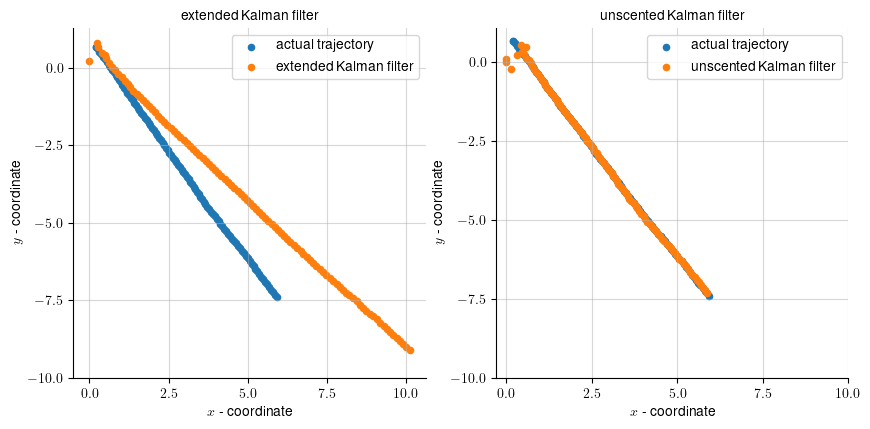

In [40]:
#figure 6 (comparing EKF and UKF)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.scatter(avec, bvec, label="actual trajectory", s=20)
ax.scatter(aEKF, bEKF, label="extended Kalman filter", s=20)
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("extended Kalman filter", fontsize=10)
ax.spines[['right', 'top']].set_visible(False)
plt.xticks(np.arange(0, 12.5, 2.5))
plt.yticks(np.arange(0, -12.5, -2.5))
plt.grid(zorder=0, alpha=0.5)
plt.legend()

ax = fig.add_subplot(222)
ax.scatter(avec, bvec,label="actual trajectory", s=20)
ax.scatter(avec_hat, bvec_hat, label="unscented Kalman filter", s=20)
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("unscented Kalman filter", fontsize=10)
plt.xticks(np.arange(0, 12.5, 2.5))
plt.yticks(np.arange(0, -12.5, -2.5))
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.show()

**Figure 28.3** Actual and estimated trajectories by means of the extended and the unscented Kalman filters applied to model (30.255)--(30.256).